# BatteryLifeClassfication

# Wiki Link 
https://mobilerndhub.sec.samsung.net/wiki/display/B2BANALYZE/Battery+Life+ML+Usecase1%3A+Data+Driven+Approach+for+Classifying+Batteries+degradation

In [1]:
# Loading Liberaries
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import xgboost
import warnings
warnings.simplefilter(action='ignore')
from xgboost import plot_importance
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from scipy.optimize import curve_fit

# Reading Data

In [5]:
dataset_path = r"C:\Users\manisha.g\Documents\Work\KNOX2.0\BatteryCycle\Battery_code_poc\Classification\KnoxV2_ML\BatteryLifeClassificationPOC1\BatteryMLData.csv"

# Finding Co-realtion coff

In [6]:
raw_dataset = pd.read_csv(dataset_path)
dataset_stats = raw_dataset.describe()
print(raw_dataset)
print(raw_dataset.corr())
a = np.zeros(12)
b = np.zeros(12)
e = np.zeros(12)

     age  SOC  cycle_count  discharge_rate  RemainingLife Battery_health
0     17 0.25          214            0.06           0.93           Best
1     24 0.79          483            0.06           0.85           Good
2     18 0.81          437            0.09           0.90           Best
3     12 0.83          460            0.05           0.87           Good
4     16 0.85          506            0.07           0.86           Good
..   ...  ...          ...             ...            ...            ...
106   10 0.76          200            0.04           0.91           Best
107   10 0.71          200            0.06           0.92           Best
108   30 0.66          600            0.31           0.66            Bad
109    2 0.61           40            0.04           0.91           Best
110    2 0.56           40            0.00           0.92           Best

[111 rows x 6 columns]
                 age   SOC  cycle_count  discharge_rate  RemainingLife
age             1.00 -0.45   

In [7]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import squarify
import numpy as np
FilePath = r'C:\Users\manisha.g\Documents\Work\KC'
os.chdir(FilePath)
pd.options.display.float_format = "{:.2f}".format
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import classfication_report
from sklearn.metrics import classification_report
##confusion_matrix  #https://realpython.com/logistic-regression-python/#logistic-regression-in-python-with-scikit-learn-example-1
from sklearn.metrics import confusion_matrix
import psycopg2
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
from six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling

In [8]:
raw_dataset.columns

Index(['age', 'SOC', 'cycle_count', 'discharge_rate', 'RemainingLife',
       'Battery_health'],
      dtype='object')

In [9]:
raw_dataset.head()

,age,SOC,cycle_count,discharge_rate,RemainingLife,Battery_health
0,17,0.25,214,0.06,0.93,Best
1,24,0.79,483,0.06,0.85,Good
2,18,0.81,437,0.09,0.90,Best
3,12,0.83,460,0.05,0.87,Good
4,16,0.85,506,0.07,0.86,Good


In [10]:
raw_dataset['Battery_health'],class_names = pd.factorize(raw_dataset['Battery_health'])
raw_dataset['Battery_health'].head()

0    0
1    1
2    0
3    1
4    1
Name: Battery_health, dtype: int64

In [11]:
class_names

Index(['Best', 'Good', 'Poor', 'Bad'], dtype='object')

In [12]:
def get_training_test_set (df):
                            train_col = ['age','SOC','cycle_count','discharge_rate','RemainingLife']
                            y= df.Battery_health
                            raw_x=df[train_col]
                            ms = MinMaxScaler() # Feature Scaling
                            X = ms.fit_transform(raw_x)
                            x=pd.DataFrame(X, columns=[train_col])

                            X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.3,stratify= y,random_state=42)
                            return (X_train,x_test,Y_train,y_test)

# Getting Cleaned data with Train & Test data set

In [13]:
X_train,x_test,Y_train,y_test = get_training_test_set(raw_dataset)

# Decision Tee, Evaluation Matrix

In [14]:
from sklearn.metrics import confusion_matrix
def decisiontree (X_train,x_test,Y_train,y_test):
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    tree_clf.fit(X_train,Y_train)
    print("Decisiontree Accuracy on training set: {:.3f}".format(tree_clf.score(X_train, Y_train)))
    print("Decisiontree Accuracy on test set: {:.3f}".format(tree_clf.score(x_test, y_test)))
    print ("\n Feature Importance \n")
    print("\n \n Decision Tree: feature_importances")
    plot_feature_importances(tree_clf);
    #print(tree_clf.feature_importances_)
    for importance, name in sorted(zip(tree_clf.feature_importances_, X_train.columns),reverse=True)[:5]:
        print (name, importance)
    
    print("\n Decision Tree: Evaluation Matrix")
    #tree.plot_tree(clf)
    evaluation_metric(tree_clf,X_train,x_test,Y_train,y_test)
    return tree_clf
    
    
def evaluation_metric(model,X_train,x_test,Y_train,y_test):
        cm = confusion_matrix(y_test, model.predict(x_test))
        sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
       # ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        print(classification_report(y_test, model.predict(x_test)))
        
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.bar(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Decision Tree Results

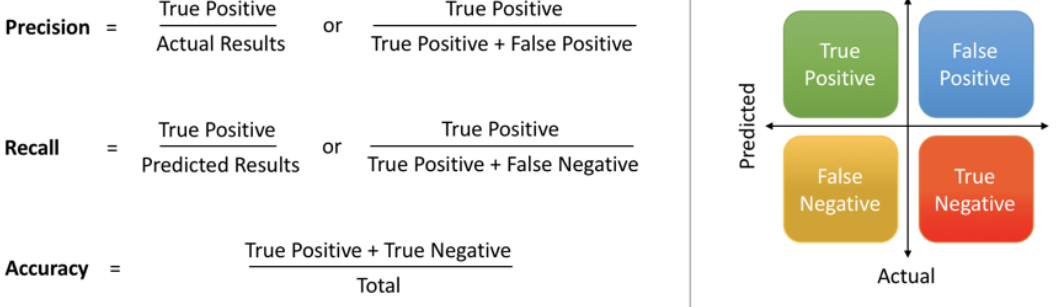

Decisiontree Accuracy on training set: 0.961
Decisiontree Accuracy on test set: 0.912

 Feature Importance 


 
 Decision Tree: feature_importances
('cycle_count',) 0.5226093482365164
('RemainingLife',) 0.4428473842010197
('discharge_rate',) 0.03454326756246382
('age',) 0.0
('SOC',) 0.0

 Decision Tree: Evaluation Matrix
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.88      0.93         8
           2       1.00      0.78      0.88         9
           3       0.82      1.00      0.90         9

    accuracy                           0.91        34
   macro avg       0.93      0.91      0.91        34
weighted avg       0.93      0.91      0.91        34



C:\Users\manisha.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


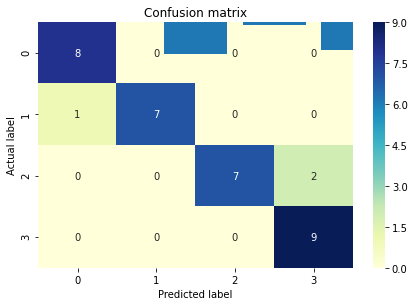

In [15]:
model = decisiontree(X_train,x_test,Y_train,y_test);

# Tree Text_representation

In [16]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 0.45
|   |--- feature_4 <= 0.91
|   |   |--- class: 1
|   |--- feature_4 >  0.91
|   |   |--- feature_3 <= 0.09
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.09
|   |   |   |--- class: 0
|--- feature_2 >  0.45
|   |--- feature_4 <= 0.27
|   |   |--- class: 2
|   |--- feature_4 >  0.27
|   |   |--- class: 3



# Visualizing tree

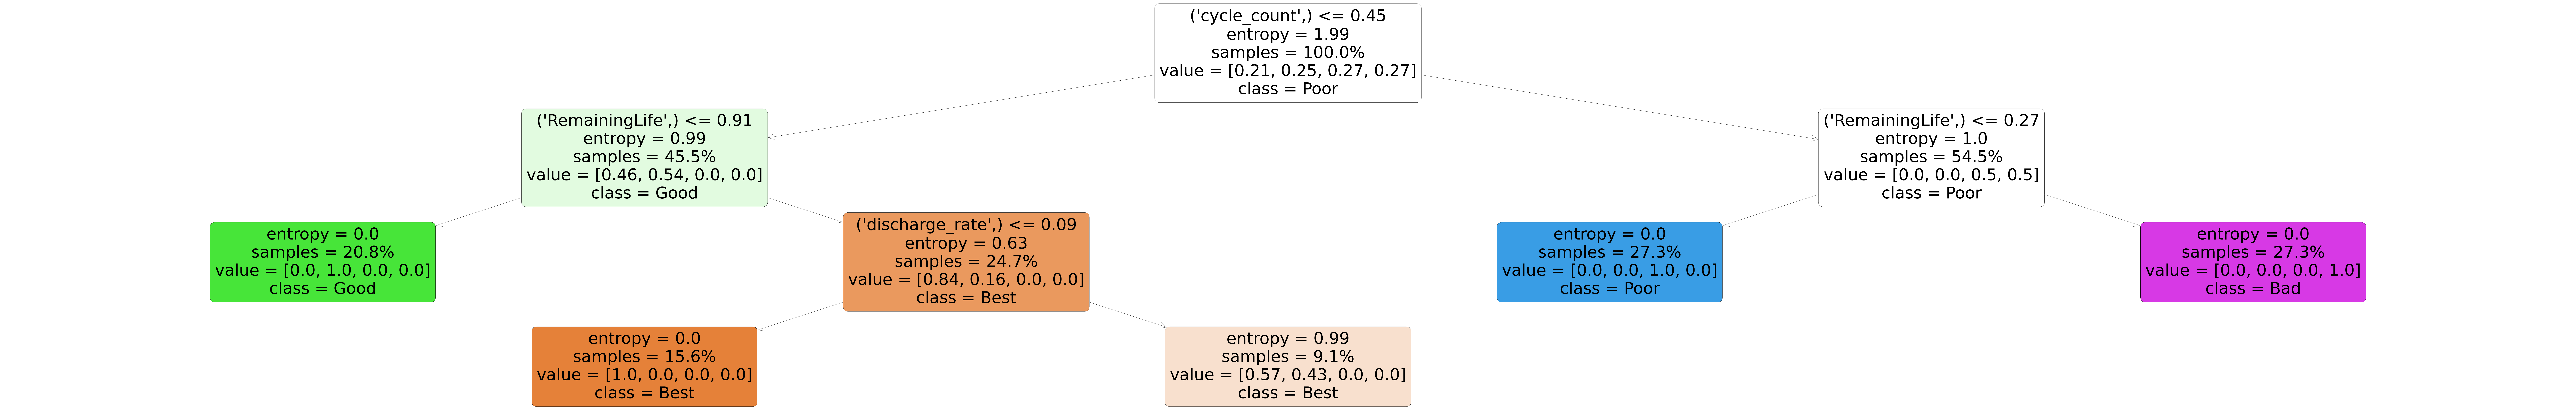

In [17]:
fig = plt.figure(figsize=(300,50))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,  
                   class_names=class_names
                  ,proportion = True
                  ,rounded= True
                  ,precision=2
                  ,filled=True)
                  #,special_characters=True)
    
plt.savefig('BatteryClass.png')
plt.show()

# XGBoost Classifier

XGBoost has a scikit-learn API, which is useful if you want to use different scikit-learn classes and methods on an XGBoost model (e.g.,predict(), fit()). In this section, we'll try the API out with the xgboost.XGBClassifier() class and get a baseline accuracy for the rest of our work. So that our results are reproducible, we'll set the random_state=123.

As a reminder, gradient boosting sequentially trains weak learners where each weak learner tries to correct its predecessor's mistakes. First, we'll instantiate a simple XGBoost classifier without changing any of the other parameters, and we'll inspect the parameters that we haven't touched.

In [18]:
# Instatiate a XGBClassifier 
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

There's a couple of things to note:

The booster parameter is gbtree. This means the weak learners, or boosters, are decision trees in this model. gbtree is the default, and we will keep it this way.

The objective function, or loss function, is defined as binary:logistic. The objective function quantifies how far off a prediction is from the actual results. We want to minimize this to have the smallest possible loss. binary:logistic is the default for classifiers. binary:logistic outputs the actual predicted probability of the positive class (in our case, that a booking is cancelled).

n_estimators is the number of gradient boosted trees we want in our model. It's equivalent to the number of boosting rounds. For our purposes, we don't want too many boosting rounds, or training will take too long. Let's lower it from 100 to 10.

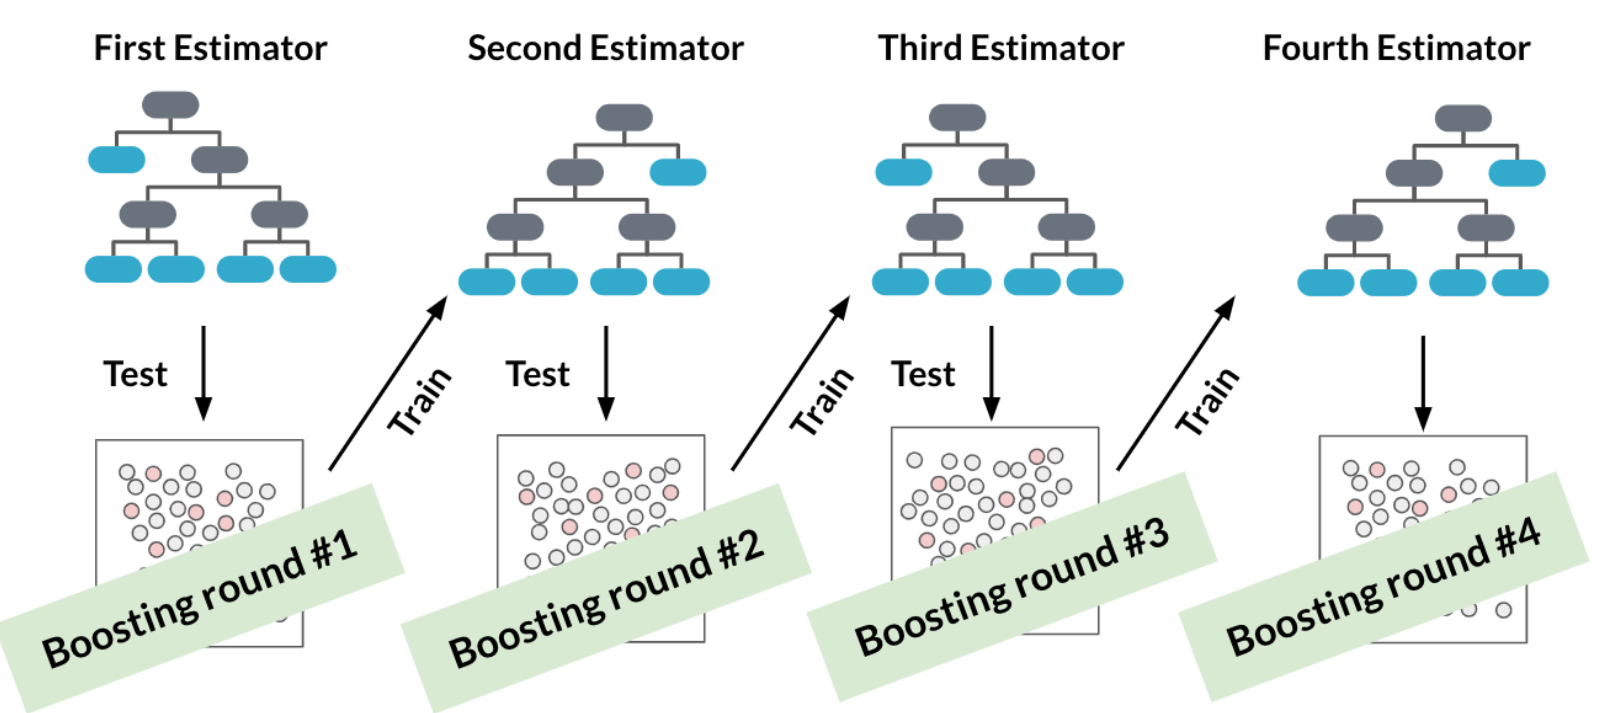

max_depth is the maximum tree depth allowed. Tree depth is the length of the longest path from the root node to a leaf node. Making this too high will give our model more variance, or more potential to overfit. Similar to n_estimators, the more we increase this, the longer our training period will be. Let's keep this at 3.
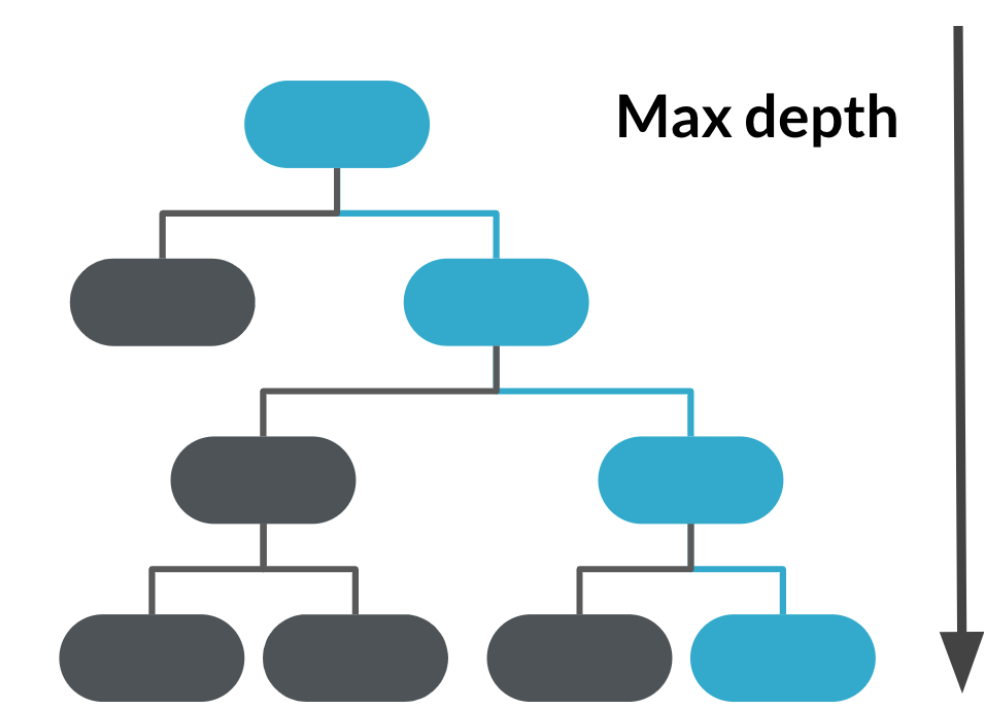

In [19]:
## Set max_depth to be 10 instead of 100
xgb_clf.set_params(n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, Y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(x_test)

# Compute the accuracy
accuracy_score(y_test, preds)

C:\Users\manisha.g\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8235294117647058

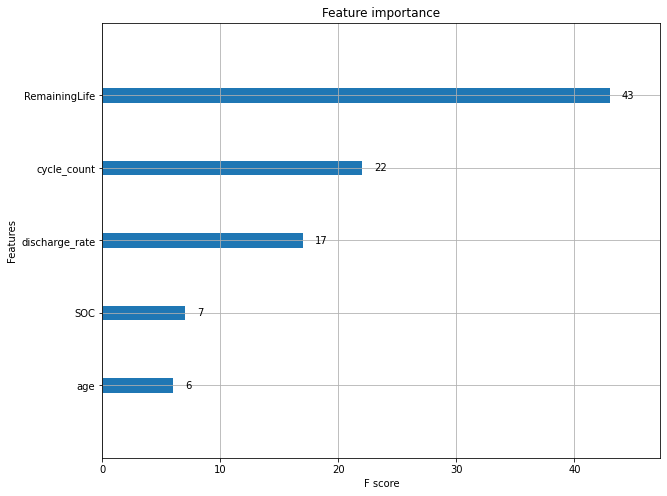

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf)

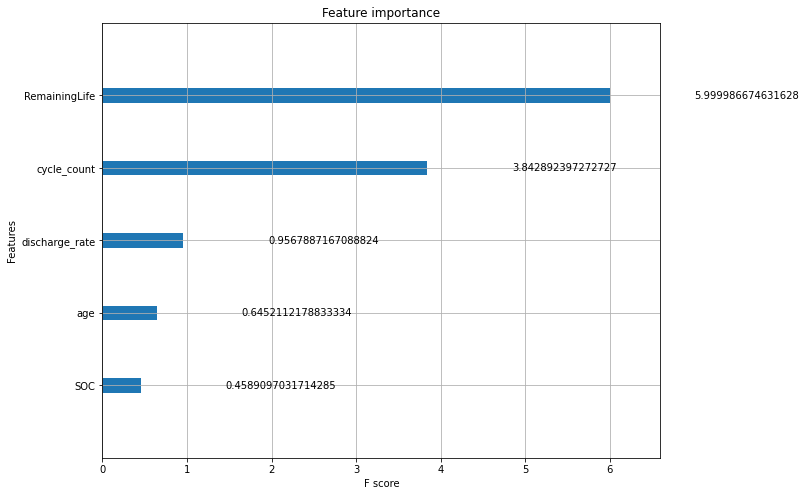

In [21]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")

# Gradient Boosting


In [22]:
def get_prediction (model,x_test,y_test):
    y_pred = model.predict(x_test)
    print(str(model)[0:10]+' accuracy_score',accuracy_score(y_test, y_pred))

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gsb_clf = GradientBoostingClassifier()
gsb_clf.fit(X_train,Y_train)

get_prediction (gsb_clf,x_test,y_test)

C:\Users\manisha.g\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


GradientBo accuracy_score 0.9411764705882353


# AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, Y_train)
get_prediction (ada_clf,x_test,y_test)



AdaBoostCl accuracy_score 0.7058823529411765


# Voting Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5, 
                             random_state=42)
gsb_clf = GradientBoostingClassifier()
xgb_clf = xgb.XGBClassifier(random_state=123)


voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('Adb', ada_clf),('gb',gsb_clf),('xgb',xgb_clf)],
    voting='hard')

# If ‘hard’, uses predicted class labels for majority rule voting. 
# Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

voting_clf.fit(X_train, Y_train)


# Getting Accurancy
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf,ada_clf,gsb_clf,xgb_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(x_test)
    warnings.filterwarnings("ignore")
    warnings.warn('my warning')
    print('\n')
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('\n')
    warnings.filterwarnings("ignore")
    warnings.warn('my warning')

[15:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LogisticRegression 0.9705882352941176




RandomForestClassifier 0.9411764705882353




SVC 0.7058823529411765


[15:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier 0.9411764705882353


